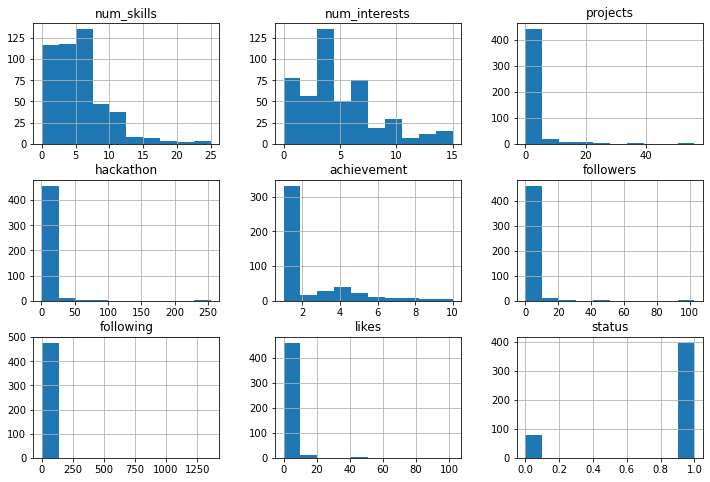

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('clean_data.csv')

df.hist(grid=True, figsize=(12,8))
plt.show()

In [2]:
df.sample(5)

,country,num_skills,num_interests,projects,hackathon,achievement,followers,following,likes,status
392,India,9,9,4,69,5,1,0,3,0
299,India,3,5,0,1,1,0,0,0,1
458,US,1,7,0,2,1,2,0,0,1
212,US,6,2,0,1,1,0,0,0,1
312,US,5,4,0,1,1,2,2,0,1


In [3]:
num_cols = df.iloc[:, 1:9].columns

In [4]:
df[num_cols].head()

,num_skills,num_interests,projects,hackathon,achievement,followers,following,likes
0,3,5,1,2,4,4,6,1
1,3,1,0,1,1,0,0,0
2,8,8,8,19,9,17,9,8
3,11,6,6,186,9,11,14,42
4,5,2,3,7,4,3,1,5


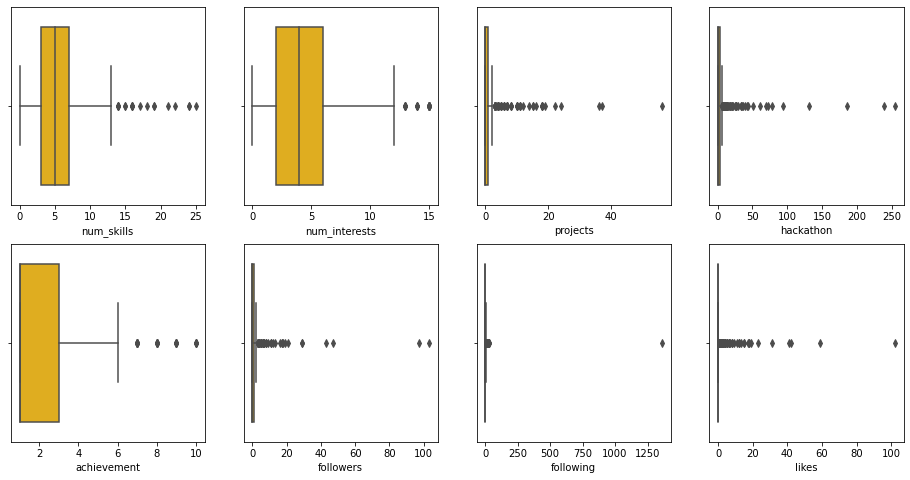

In [5]:
def boxplot_for_outlier(df,columns):
    count = 0
    fig, ax =plt.subplots(nrows=2,ncols=4, figsize=(16,8))
    for i in range(2):
        for j in range(4):
            sns.boxplot(x = df[columns[count]], palette="Wistia",ax=ax[i][j])
            count = count+1

boxplot_for_outlier(df, num_cols)

## Euclidean distance multivariate outlier detection and removel

In [6]:
df[num_cols].mean()

num_skills       5.311715
num_interests    4.686192
projects         1.504184
hackathon        5.989540
achievement      2.117155
followers        1.861925
following        4.144351
likes            1.493724
dtype: float64

In [7]:
# Find the mean point in the 8D
datamean = np.array(df[num_cols].mean())

In [8]:
# Create a vector to store all the distances
ds = np.zeros(df.shape[0])

In [9]:
# Compute distance of each point to the mean
from scipy.spatial import distance

for i in range(df.shape[0]):
    ds[i] = distance.euclidean(datamean, 
                               df[num_cols].iloc[i].to_numpy())

In [50]:
# Convert to z-score
dsmean = np.mean(ds)
dsstd  = np.std(ds, ddof=1)

dsz = (ds - dsmean) / dsstd

Text(0.5, 1.0, 'Z-score distribution')

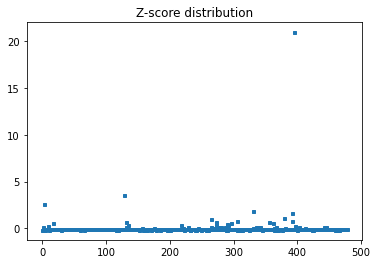

In [55]:
plt.plot(dsz, 's', markersize=3)
plt.title('Z-score distribution')

Text(0.5, 1.0, 'Z-score distribution')

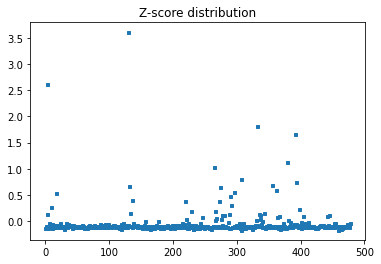

In [57]:
plt.plot(dsz[dsz < 20], 's', markersize=3)
plt.title('Z-score distribution')

Text(0.5, 1.0, 'Z-score distribution')

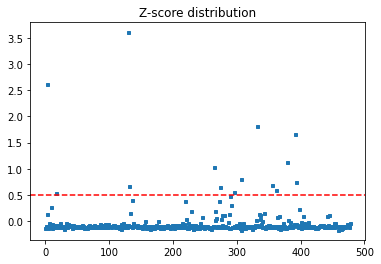

In [60]:
plt.plot(dsz[dsz < 20], 's', markersize=3)
plt.axhline(y=0.5, color='r', linestyle='--')
plt.title('Z-score distribution')

In [63]:
df.iloc[np.where(dsz > 0.5)]

,country,num_skills,num_interests,projects,hackathon,achievement,followers,following,likes,status
3,India,11,6,6,186,9,11,14,42,0
17,India,2,14,10,42,7,13,30,13,1
129,Romania,11,14,11,254,8,29,3,6,0
131,India,15,8,56,13,3,1,1,17,0
264,Unknown,10,9,22,29,9,47,22,59,1
273,US,10,6,18,39,10,29,28,23,1
296,US,25,15,19,35,9,19,28,11,1
306,India,6,2,0,72,8,11,6,3,1
331,Unknown,16,9,0,131,8,43,4,15,1
355,US,19,12,1,61,5,18,4,2,1
